#Asset Pricing Week 1 - Homework Questions

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm

###Homework 1 Horizon effects in returns 

This assignment gives you some practice and review in discrete-time time-series manipulations. You'll also answer some interesting questions -- how should returns behave at different horizons, daily, weekly, monthly, annual, etc. You'll learn about the standard errors of returns, and why it's so hard to measure premiums in the stock market. And you'll investigate whether correlation properties of returns make stocks more or less attractive to long-run investors.

Suppose first that one-year log returns $r_t=log(R_t)$ are not correlated over time $cov(r_t,r_{t+j})=0$ and have mean $E(r_t)=\mu$ and variance $\sigma^2\left\{r_t\right\}=\sigma^2$ that are constant over time.
The compound log long-horizon return is $\log(R_{t+1}R_{t+2}\dots R_{t+k})=r_{t+1}+r_{t+2}+\dots+r_{t+k}$ and the annualized compound log long-horizon return is $\log\left[  (R_{t+1}R_{t+2}\dots R_{t+k})^{\frac{1}{k}}\right]  =\frac{1}{k}\left[  r_{t+1}+r_{t+2}+\dots+r_{t+k}\right]$.
Now, let's think about how these returns scale with horizon. The big question underlying this analysis is: are returns in some sense "safer" for long-horizon investors? 

####Question 1

For the first set of questions, you will explore how returns scale with horizon. There is a suspicion that "stocks are safer for long-run investors" which we will chase down repeatedly through the course. For now, we'll just understand how returns scale with horizon

What is the mean log long-horizon return $E\left\{  r_{t+1}+r_{t+2}+\dots+r_{t+k}\right\}$ as a function of the horizon $k$ and the one-period mean $\mu$? 

> **Answer**: $\boldsymbol{\mu k}$

####Question 2

What is the mean annualized log long-horizon return $E\left\{  \frac{1}{k}\left[  r_{t+1}+r_{t+2}+\dots+r_{t+k}\right]  \right\}$ as a function of the horizon $k$ and the one-period mean $\mu$?

> **Answer**: $\boldsymbol{\mu}$

####Question 3

If the mean annual return $\mu$ is 6%, what value do you expect for the mean monthly return? What value do you expect for the mean annualized monthly return?


In [2]:
mu = 0.06
k = 12

print('{:.2f} {:.2f}'.format(*np.array([mu/k, mu])*100))

0.50 6.00


####Question 4

What is the variance of the log long-horizon return $\sigma^{2}\left\{  r_{t+1}+r_{t+2}+..+r_{t+k}\right\}$ as a function of the horizon $k$ and the one-period return variance $\sigma^2$? 

> **Answer: $\boldsymbol {k \sigma^2}$**

####Question 5

What is the variance of the annualized log long-horizon return $\sigma^{2}\left\{ \frac{1}{k}\left[ r_{t+1}+r_{t+2}+..+r_{t+k}\right]\right\}$ as a function of the horizon $k$ and the one-period return variance $\sigma^2$

> **Answer: $\boldsymbol {(1 / k) \sigma^2}$**

####Question 6

If the standard deviation of annual returns is 20%, what are the standard deviations of monthly and daily returns? 

In [3]:
sigma = 0.2

print('{:.2f} {:.2f}'.format(*np.sqrt([sigma**2/12, sigma**2/365])*100))

5.77 1.05


####Question 7

Find the "Sharpe ratio" (in quotes since you're using logs but not making a convexity adjustment and not subtracting a risk free rate) of log long-horizon returns $\frac{E\left\{r_{t+1}+..+r_{t+k}\right\}}{\sigma\left\{r_{t+1}+..+r_{t+k}\right\}}$ as a function of horizon $k$ and the one-year Sharpe ratio $\frac{\mu}{\sigma}$.

> **Answer: ** $\boldsymbol {\frac{\mu \sqrt{k}}{\sigma}}$

####Question 8
If the annual Sharpe ratio is about 0.5 (8% mean, 16% standard deviation), then what are the monthly and daily (365 days) Sharpe ratios?

In [4]:
sharpe_ratio = 0.5

print('{:.5f} {:.5f}'.format(*[sharpe_ratio/np.sqrt(12), sharpe_ratio/np.sqrt(365)]))

0.14434 0.02617


####Question 9

The typical portfolio allocation formula says stock allocation should depend on the ratio of mean to variance of total return:

$$\text{stock share}=\frac{1}{\text{risk aversion}}\times\frac{E(r)}{\sigma
^{2}(r)}.$$

(The correct formula uses excess arithmetic returns, rather than log returns, but we'll get approximately the right answers here.)

Should an investor with a 10 year horizon allocate more to stocks than an investor with a 1 year horizon because "stocks are safer in the long run" and he can "wait out market declines?" Or should he allocate less, or the same amount?

>**Answer: The same**

####Question 10

The usual formula for the standard error of mean returns is $\sigma \left\{\bar{r}\right\}=\sigma(r)/\sqrt{T}$ where $\bar{r}\equiv\frac{1}{T}\sum_{t=1}^{T}r_{t}$ is the sample mean. The t-statistic is given by $t\left\{\bar{r}\right\} = \frac{\bar{r}}{\sigma\left\{\bar{r}\right\}}$. Calculate the standard error of mean annual stock returns and the corresponding t- statistics using 5, 20, and 50 years of data. Assume a 7% sample mean return $\mu$, and assume a 20% standard deviation $\sigma=\sigma(r)=20\%$. 

In [5]:
mu = 0.07
sigma = 0.2
T = np.array([5, 20, 50])
se = sigma/np.sqrt(T)*100
t =  mu/sigma*np.sqrt(T)
print('{:.2f} {:.2f} {:.2f} {:.2f} {:.2f} {:.2f}'.format(*np.concatenate([se, t])))

8.94 4.47 2.83 0.78 1.57 2.47


####Question 11

How many years of data would you need to establish that a 7% mean return is at least two standard errors above zero, i.e. has a t statistic of two? Use $\sigma$=.20, i.e. 20%.

>**Answer: $\boldsymbol {Solve \,for \;2=\frac{\mu}{\sigma/\sqrt{T}}}$**

In [6]:
print('{:.2f} '.format(4*sigma**2/mu**2))

32.65 


####Question 12

You should see that average returns are distressingly hard to measure accurately. A natural thought: maybe we could measure returns more precisely if we used more frequent data. Do you expect the t statistic for mean returns in 5 years of daily data (5 x 365 data points of daily returns) to be larger, smaller, or equal to the t statistic for 5 years of annual returns (5 data points of annual returns)?

Assume the variance $\sigma$ is known and does not have to be estimated. The best way to answer this question is to derive a formula for the t statistic of a mean return using T years of k horizon returns. As in previous questions, we're looking at log returns so the two period return is r1+r2 and assume returns are uncorrelated over time.

> **Answer: equal **

> Only the actual span of time matters for the t statistic for mean returns, not the number of data points! Using more frequently measured data does not help. As another way to see it, if we define $v_t=v_{t−1}+r_t$ as the cumulative return process, the mean return just depends on $v_T−v_1$ and not on how many steps we subdivide the interval between 1 and T. I assumed we know $\sigma$. It turns out variances are more precisely measured in high frequency data, so there is a little help there, but not a lot.

####Question 13

Now, what if returns have some "momentum" or "mean-reversion?" Does this make long horizon returns "safer?" To answer this question, suppose returns follow the MA(1) process

$$r_{t}=\mu+\varepsilon_{t}+\theta \varepsilon_{t-1}$$

where the $\epsilon_t$ are independent over time and $E(\epsilon_t)=0$ and $\sigma^2\left\{ \epsilon_t \right\}=\sigma^2_\epsilon$. Start by getting familiar with the MA(1). What is $E \left\{r_t\right\}$? 

> **Answer: $\boldsymbol \mu$**

####Question 14

Continuing the MA(1) example, what is $\sigma^2\left\{ \epsilon_t \right\}$?

> **Answer: $\boldsymbol (1+\theta^2)\sigma^2$**

####Question 15

What is $cov(r_t,r_{t−1})$? 

> **Answer: $\boldsymbol \theta \sigma^2$**

> The autocorrelation of the MA(1) is $cov(r_t,r_{t−1})/var(r)= \frac{\theta}{1+\theta^2}$

####Question 16
What is $cov(r_t,r_{t−2})$?

> **Answer: zero**

###Question 17

When we looked at the AR(1) model, we summarized how it works with an impulse-response function. We set all past $\epsilon$ to zero, and thus all past $x$ to zero. Then we set $\epsilon_1$ to one, thus $x_1$ to one, set all future $\epsilon$ to zero, and watched the system move. This is the same thing as asking for the conditional mean of $x_t$ given that $x_1=1$ and all past $x$. Let's do the same thing here.

Find and plot (for yourself) the impulse-response function and cumulative response function, i.e. the path followed by $\left\{r_t\right\}$ and $\left\{pt\right\}$ where $r_t=\epsilon_t+\theta \epsilon_{t−1}$, $p_t=p_{t−1}+r_t$, if $\epsilon_t=0$ for all $t$ except $\epsilon_1=1$, for the case $\theta=+0.5$, ("momentum") $\theta=0$ ("i.i.d." or "random walk"), and $\theta=−0.5$ ("mean reversion"). Assume $\mu=0$ and $p_0=0$ (think of it as the log price).

Since we can't grade a plot, write the values in the next few questions.

Following the $\epsilon_t=1$ shock at $t=1$, what are the values of $r_t$ for t=1, 2, 3, 4 when $\theta= 0.5$? 


In [7]:
eps = np.array([1., 0., 0., 0.])
theta = 0.5
r_momentum = np.concatenate([[1.],[e*theta for e in eps[:-1]]])
print('{:} {:} {:} {:}'.format(*r_momentum))

1.0 0.5 0.0 0.0


####Question 18

What are the values of $p_t$ for t=1, 2, 3, 4 when θ=.5?

1.0 1.5 1.5 1.5


/usr/local/lib/python3.4/dist-packages/matplotlib-1.5.x-py3.4-linux-x86_64.egg/matplotlib/font_manager.py:1279: UserWarning: findfont: Font family ['Arial'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


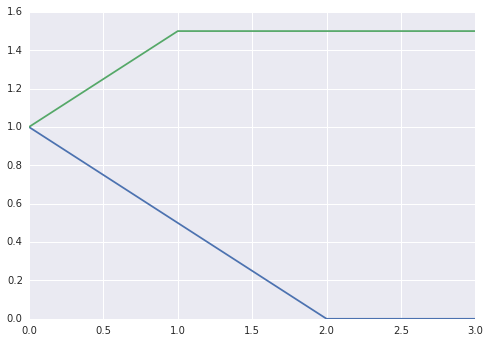

In [8]:
p_momentum = np.ones(len(eps))
for i in range(1,len(eps)):
    p_momentum[i] = p_momentum[i-1] + r_momentum[i]
print('{:} {:} {:} {:}'.format(*p_momentum))

plt.plot(r_momentum)
plt.plot(p_momentum);

####Question 19

What are the values of $r_t$ for t=1, 2, 3, 4 when $\theta=0$?

In [9]:
theta = 0

r_iid = np.concatenate([[1.],[e*theta for e in eps[:-1]]])
print('{:} {:} {:} {:}'.format(*r_iid))

1.0 0.0 0.0 0.0


####Question 20

What are the values of $p_t$ for t=1, 2, 3, 4 when $\theta=0$? 

1.0 1.0 1.0 1.0


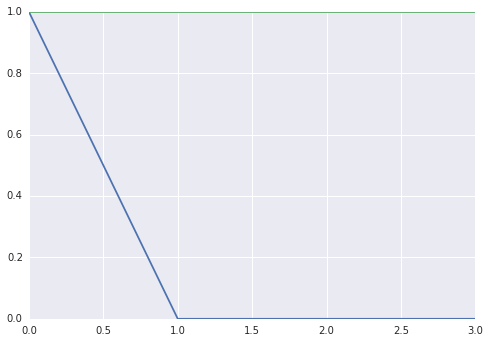

In [10]:
p_iid = np.ones(len(eps))
for i in range(1,len(eps)):
    p_iid[i] = p_iid[i-1] + r_iid[i]
print('{:} {:} {:} {:}'.format(*p_iid))

plt.plot(r_iid)
plt.plot(p_iid);

####Question 21

What are the values of $r_t$ for t=1, 2, 3, 4 when $\theta=−0.5$? 

In [11]:
theta = -0.5

r_mr = np.concatenate([[1.],[e*theta for e in eps[:-1]]])
print('{:} {:} {:} {:}'.format(*r_mr))

1.0 -0.5 -0.0 -0.0


####Question 22

What are the values of $p_t$ for t=1, 2, 3, 4 when $\theta=−0.5$? 

1.0 0.5 0.5 0.5


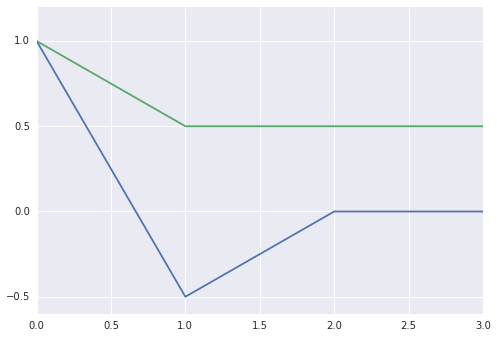

In [12]:
p_mr = np.ones(len(eps))
for i in range(1,len(eps)):
    p_mr[i] = p_mr[i-1] + r_mr[i]
print('{:} {:} {:} {:}'.format(*p_mr))

plt.plot(r_mr)
plt.plot(p_mr);

####Question 23

Take a deep breath. You reminded yourself how an MA(1) works. Now, let's look at long-horizon returns.

Let $r_t=\mu+\epsilon_t+\theta \epsilon_{t−1}$ and denote the variance of $\epsilon$ by $\sigma^2_\epsilon$.

Find a formula for the unconditional mean of horizon-$k$ log returns $E\left[  \sum_{j=1}^{k}r_{t+j}\right]$. When $\theta>0$ (momentum), is the mean long horizon return $E\left[  r_{t+1}+r_{t+2}+\dots+r_{t+k}\right]$ greater than, equal to, or less than k times the average one year return $E\left\{r_t\right\}$?

>**Answer: equal**
>Momentum or mean reversion have no effect on the unconditional mean. They affect conditional means, as shown by the impulse response function

####Question 24

To characterize whether returns are more or less risky at long horizons, we use the variance ratio statistic. This is the ratio of long-run variance to horizon times the short run variance. For horizon-$k$ returns, the statistic is

$$\frac{\sigma^2\left\{\sum_{j=1}^kr_{t+j}\right\}}{k\sigma^2\left\{r_t\right\}}$$

The variance ratio is one if returns are uncorrelated over time.

Find a formula for the variance ratio of an our MA(1), $r_t=\mu+\epsilon_t+\theta \epsilon_{t−1}$ at horizon $k$.

>**Answer: $\sigma^2[r_{t+1}+r_{t+2}+..+r_{t+k}] =k var(r)+2(k-1)cov(r_{t},r_{t-1}) \\ =\left[ k+2(k-1)\frac{\theta}{(1+\theta^2)}\right]\sigma^2(r) \\=k\left[1+2\frac{(k-1)}{k} \frac{\theta}{(1+\theta^2)}\right]\sigma^2(r)$ **

>**Which simplifies to: $\boldsymbol {1+2\frac{(k-1)}{k} \frac{\theta}{(1+\theta^2)}}$**

####Question 25

Suppose $\mu=1$ and $\sigma^2_\epsilon=1$. What are the values of the variance ratio

$$\frac{\sigma^2\left\{\sum_{j=1}^kr_{t+j}\right\}}{k\sigma^2\left\{r_t\right\}}$$

for $k=2,5,\infty$ when $\theta$=1?

In [13]:
k = np.array([2,5,1e199])
theta =1

print('{:.2f} {:.2f} {:.2f}'.format(*1+2*(k-1)/k*theta/(1+theta**2)))

1.50 1.80 2.00


####Question 26

So finally, recall that the formula (which we will derive later) for the portfolio weight is

$$\text{share} = \frac{1}{\text{risk aversion}} \frac{\text{mean return}}{\text{variance of return}}$$

Does mean-reversion ($\theta<0$) make long-horizon returns more, less, or equally attractive than one-year returns to long-term investors?

>**Answer: More attractive, because mean reversion lowers the variance of long run returns**

###Homework 2 Log-Normal Returns

For this set of problems, we'll explore the standard geometric Brownian motion model for stock returns, 

$$\frac{dp_{t}}{p_{t}}=\mu dt+\sigma dz_{t}$$

Recall the solution for the T period log and arithmetic return,

$$ \begin{align*}
R_{T}  \equiv\frac{p_{T}}{p_{0}}=e^{\left(  \mu-\frac{1}{2}\sigma
^{2}\right)  T+\sigma\sqrt{T}\varepsilon_{t}} \;\;\varepsilon_{T} \sim N(0,1)
\end{align*}$$

$$\log\left(  R_{T}\right)    =\left(  \mu-\frac{1}{2}\sigma^{2}\right)
T+\sigma\sqrt{T}\varepsilon_{t} \;\; \varepsilon_{T}\sim N(0,1)
$$

As you can see, the log return works just like the discrete time log returns we explored in the last problem. In particular mean and variance scale with horizon:

$$\begin{align*}
E\left[  \log\left(  R_{T}\right)  \right]    & =\left(  \mu-\frac{1}{2}%
\sigma^{2}\right)  T\\
\sigma^{2}\left[  \log\left(  R_{T}\right)  \right]    & =\sigma^{2}T
\end{align*}$$

So the "Sharpe ratio" scales with the square root of the horizon:

$$\frac{E\left[  \log\left(  R_{T}\right)  \right]  }{\sigma\left[  \log\left(
R_{T}\right)  \right]  }=\frac{\left(  \mu-\frac{1}{2}\sigma^{2}\right)
}{\sigma}\sqrt{T}%$$

The mean and variance of annualized returns are

$$ \begin{align*}
E\left[  \frac{1}{T}\log\left(  R_{T}\right)  \right]    & =\left(  \mu
-\frac{1}{2}\sigma^{2}\right)  \\
\sigma^{2}\left[  \frac{1}{T}\log\left(  R_{T}\right)  \right]    &
=\frac{\sigma^{2}}{T}.
\end{align*}$$

(Why is $\frac{1}{T}log(R_T)$ the continuously compounded annualized return? Because $e^{T\left(  \frac{1}{T}\log\left(  R_{T}\right)
\right)  }=R_{T}$.) The latter result makes it look like returns are more stable in the long run, but that's a mistake.

In this set of problems, we'll look at the properties of the corresponding arithmetic return $p_T/p_0$

####Question 1

Suppose that the log return $r_t$ is normally distributed with mean $\mu$ and standard deviation $\sigma$. The arithmetic return is $R_t=e^{r_t}$. The $T$-year arithmetic return is the compounded return $R_1R_2\dots R_T$.

Using the formula $E(e^{x})=e^{E(x)+\frac{1}{2}\sigma^{2}(x)}$ for any normally-distributed x, find the mean, variance and Sharpe ratio of $T$-year arithmetic returns.

Report the formula for the expected value of the $T$-horizon return $E\left\{R_1R_2\dots R_T\right\}$

>**Answer: $\boldsymbol {e^{\mu T}}$**

####Question 2

What is the formula for the standard deviation of the $T$-horizon return $\sigma\left\{R_T\right\}$?

>**Answer: $\boldsymbol {e^{\mu T}\sqrt{e^{\sigma^2T}-1}}$**

####Question 3

What is the formula for the Sharpe ratio of the $T$-horizon return $\frac{E\left\{R_T−R^f\right\}}{\sigma\left\{R_T\right\}}$? Assume a zero-percent riskless rate, i.e. $R_f=1$

>**Answer: $\boldsymbol {\frac{1-e^{-\mu T}}{\sqrt{e^{\sigma^2T}-1}}}$**

####Question 4
Suppose $\mu=0.06$ (i.e. 6%) and $\sigma=0.20$ (i.e. 20%.) What are the mean, standard deviation, and Sharpe ratio of 1-year arithmetic returns?

The point of the question is to compare these lognormal formulas to 6%, 20%, and 6/20=0.33 and see how big a difference you get by doing it right.

In [14]:
def mean_ret(mu, t):
    return np.exp(mu*t)-1

def sd_ret(mu, sigma, t):
    return np.exp(mu*t)* np.sqrt(np.exp(sigma**2*t)-1)

def sharpe_ratio(mu, sigma, t, rf=0):
    return ((np.exp(mu*t) - np.exp(rf*t)) / (np.exp(mu*t) * np.sqrt(np.exp(sigma**2*t)-1)))

mu = 0.06
sigma = 0.2
t = 1

print('{:.3f} {:.3f} {:.3f}'.format(*np.array([mean_ret(mu,t)*100, 
                                               sd_ret(mu, sigma, t)*100, 
                                               sharpe_ratio(mu, sigma, t)])))

6.184 21.451 0.288


####Question 5

What are the mean, standard deviation, and Sharpe ratio of 10-year returns? The point is to compare these to $6×10=60$, $20×\sqrt{10}=63$ and $60/63\approx1$ (Thought question: how is a standard deviation greater than 100% possible given you can never lose more than all your money? **Answer: Yes, a standard deviation greater than 100% is possible. The right tail can be huge, and it's getting there. **) 


In [15]:
t = 10

print('{:.3f} {:.3f} {:.3f}'.format(*np.array([mean_ret(mu,t)*100, 
                                               sd_ret(mu, sigma, t)*100, 
                                               sharpe_ratio(mu, sigma, t)])))

82.212 127.786 0.643


####Question 6

What is the Sharpe ratio for 100-year returns, $R_{100}$? The point is to compare this to the log returns, where Sharpe ratios grow with the square root of horizon.


In [16]:
t = 100
print('{:.3f}'.format(sharpe_ratio(mu, sigma, t)))

0.136


####Question 7

Do mean returns grow faster than, slower than, or with the horizon $T$?

>Answer: **Faster**

####Question 8

Does the standard deviation of returns grow faster than, slower than, or with the square root of the horizon $\sqrt{T}$?

>Answer: **Faster**

####Question 9

Does the Sharpe ratio grow faster than, slower than, or with the square root of the horizon $\sqrt{T}$? (The formulas are hard to digest. The best answer is to make a graph of Sharpe ratio vs. horizon and comparison with $\frac{\mu}{\sigma} \sqrt{T}$?)

>Answer: **Slower**

/usr/local/lib/python3.4/dist-packages/matplotlib-1.5.x-py3.4-linux-x86_64.egg/matplotlib/font_manager.py:1279: UserWarning: findfont: Font family ['Arial'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


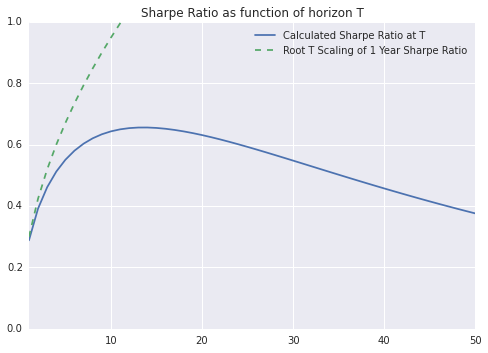

In [17]:
x = np.linspace(1,50)
plt.plot(x,[sharpe_ratio(mu, sigma, i) for i in x], label = 'Calculated Sharpe Ratio at T')
plt.plot(x, mu/sigma*np.sqrt(x), linestyle = '--', label = 'Root T Scaling of 1 Year Sharpe Ratio')
plt.title('Sharpe Ratio as function of horizon T')
plt.ylim(0,1)
plt.xlim(1,50)
plt.legend(loc='best');


####Question 10
Write a computer program to plot the distribution of 1,5,10 and 50-year arithmetic returns, using $\mu=0.06$ and $\sigma=0.20$. Calculate the mean, median, and mode, in each case, and find the probability that the return is less than its mean.

You will find the following formulas useful: if $x$ is normally-distributed (so that $e^x$ is lognormal), then

$$E(e^x) = e^{E(x)+\frac{1}{2}\sigma^2(x)}$$
$$median(e^x) = e^{median(x)} = e^{E(x)}$$
$$mode(e^x) = e^{E(x)−\sigma^2(x)}$$
$$Pr(e^x<e^y)= Pr(x<y)$$

To check your calculations, report the mean, median, and mode, and the probability that the return is less than its mean, each at the 10 year horizon.

Enter these four numbers separated by spaces. Report the first three numbers as the time T value per dollar invested, or gross return, rather than percent, e.g. if you invest \$1 and get \$1.50 report this as 1.5 rather than 50 (percent) or 0.5 (net return). Report the last number as a percent probability, e.g. 26 rather than 0.26.


,1,5,10,50
0,1.061837,1.349859,1.822119,20.085537
1,1.040811,1.221403,1.491825,7.389056
2,1.000000,1.000000,1.000000,1.000000


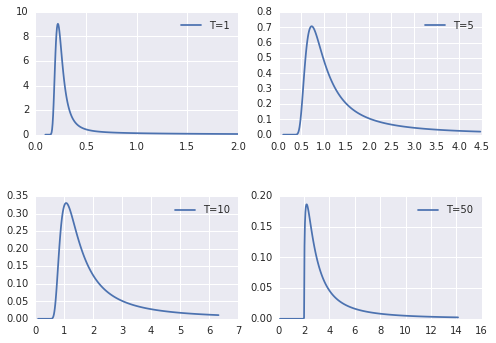

In [18]:
from scipy import stats 

mu = 0.06
sigma = 0.2
T = np.array([1, 5, 10, 50])


E_rt = np.exp(mu*T)
median = np.exp((mu - sigma**2/2)*T)
mode = np.exp((mu - 3*sigma**2/2)*T)


for n,i in enumerate(T):
    plt.subplot(2, 2, n+1)
    # values for x-axis
    x = np.linspace(0.1, 2*i/np.sqrt(i), num=400) 
    # probability distribution
    logn = stats.lognorm(x, loc=(mu-0.5*sigma**2)*i, scale=sigma*i) 
    plt.plot(x, logn.pdf(x), label = 'T={:}'.format(i))
    plt.legend()   
    
pd.DataFrame([E_rt, median, mode], columns=T)

In [19]:
from scipy import stats
t = 50
mean = np.exp(mu*t)
stats.lognorm.pdf(mean, np.exp(sigma*t), scale=np.exp(mu + (sigma**2/2)))

9.0174096015574354e-07

###Homework 3 Meet the data


####Question 1 

Download data from the appropriate [site](https://d396qusza40orc.cloudfront.net/assetpricing%2Fdata%2Fps1_data.txt). Report the mean of stock returns, treasury returns and excess returns (stock minus treasury). Then report the standard deviations in the same order. Enter your answers as numbers separated by spaces, in percent (e.g., 6.1 not .061), to one decimal. The point is to get a sense of how big these numbers are and how stocks and bonds behave. You're entering 6 numbers in the stated order. 

In [20]:
prices_df = pd.read_csv('https://d396qusza40orc.cloudfront.net/ \
                        assetpricing%2Fdata%2Fps1_data.txt', sep = '\s+', skiprows=6, 
                        names = ['Date', 'Stocks_Ret', 'D/P', 'D growth','T-bill_Ret'],
                        index_col = 0, parse_dates = True)

prices_df['Excess_Ret'] = prices_df['Stocks_Ret'] - prices_df['T-bill_Ret']

print('{:.4f} {:.4f} {:.4f} {:.4f} {:.4f} {:.4f}'.format(*[prices_df['Stocks_Ret'].mean() * 100,
                                                           prices_df['T-bill_Ret'].mean() * 100,
                                                           prices_df['Excess_Ret'].mean() * 100,
                                                           prices_df['Stocks_Ret'].std() * 100,
                                                           prices_df['T-bill_Ret'].std() * 100,
                                                           prices_df['Excess_Ret'].std() * 100]))

11.5930 3.9501 7.6429 20.3128 3.4395 20.6331


In [21]:
prices_df.describe()

,Stocks_Ret,D/P,D growth,T-bill_Ret,Excess_Ret
count,87.000000,87.000000,86.000000,87.000000,87.000000
mean,0.115930,0.038773,0.057139,0.039501,0.076429
std,0.203128,0.015024,0.153608,0.034395,0.206331
min,-0.443574,0.011134,-0.313152,-0.006810,-0.450644
25%,-0.008289,0.028530,-0.045481,0.009996,-0.068734
50%,0.143860,0.039600,0.051814,0.036026,0.103165
75%,0.268568,0.048315,0.131745,0.056127,0.210242
max,0.575033,0.072311,0.447218,0.164605,0.570378


#####Question 2
Find the "Sharpe ratio" mean to standard of excess returns. Enter a single number with two significant digits. (The excess return is the difference between arithmetic stock and bond returns, $R^e_t=R_t−R^f_t$. In most data sets the risk free rate from $t-1$ to $t$ is located in the $t-1$ row and the risky return from $t-1$ to $t$ is located in the $t$ row. However in crsp data they are both in the same row.)


In [22]:
print('{:.4f}'.format(prices_df['Excess_Ret'].mean() / prices_df['Excess_Ret'].std()))

0.3704


####Question 3
Make a plot of the stock returns, treasury bill returns, and the price-dividend ratio over time. Check that the pictures are consistent with the numbers you just calculated. The stock returns should line up with major booms and crashes you know about; the treasury returns should rise in the 70s with inflation and then fall, and the dividend yield (price/dividend upside down) should line up with the major booms and busts of market history.

Based on your plot, does the stock return seem serially correlated -- if it is above average in one year, is it likely to be above or below average next year? Does the Treasury bill return seem serially correlated? The dividend-price ratio? 

/usr/local/lib/python3.4/dist-packages/matplotlib-1.5.x-py3.4-linux-x86_64.egg/matplotlib/font_manager.py:1279: UserWarning: findfont: Font family ['Arial'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


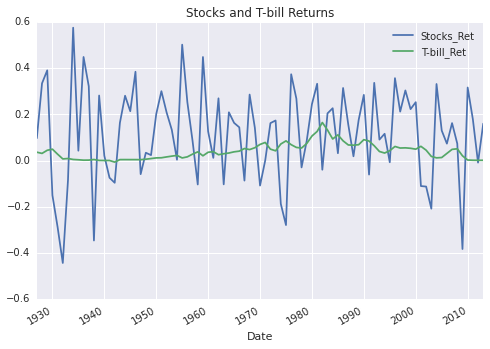

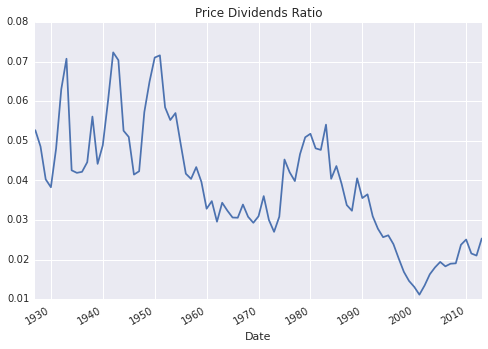

In [23]:
prices_df[['Stocks_Ret', 'T-bill_Ret']].plot(title = 'Stocks and T-bill Returns')
plt.figure()
prices_df['D/P'].plot(title = 'Price Dividends Ratio');

####Question 4
Run regressions of returns at date $t+1$ on returns at date $t$, i.e.
$R_{t+1}=a+bR_{t}+\varepsilon_{t+1};\ t=1,2,...T-1,$
where $R_t$ is the stock return at date $t$.

Report the slope coefficient, its $t$ statistic, the regression $R^2$, the mean return $E(R)$, and the standard deviation of expected returns $\sigma\{E_t(R_{t+1})\}=\sigma\{a+bR_t\}$. Enter your answers as numbers separated by spaces, and express everything appropriate in annual percent units.

*Note*:The standard deviation of expected returns is a subtle concept. It's the numerator of $R^2=\sigma^2(a+bR_t)/\sigma^2(R_t)$. Here, it's interesting to compare $\sigma(a+bR_t)$ to the mean of $R_{t+1}$, not to the variance of $R_{t+1}$. This answers the question, "how much do mean returns change over time?" as opposed to "how much of the variation in returns is predictable ahead of time?" The answer to the former can be "a lot" even if the answer to the latter is "not much."


In [24]:
ts_regr = [sm.ols('R_t1 ~ R_t', data = {'R_t1' : prices_df[i][1:].values, 
                  'R_t'  : prices_df[i][:-1].values}).fit() 
           for i in ['Stocks_Ret', 'T-bill_Ret', 'Excess_Ret']]
          

res = pd.DataFrame([(ts_regr[i].params.R_t, ts_regr[i].tvalues.R_t, 
                              ts_regr[i].rsquared, prices_df[[i]][1:].values.mean() * 100, 
                              ts_regr[i].fittedvalues.std() * 100) for i in range(3)], 
                   index = ['Stocks_Ret', 'T-bill_Ret', 'Excess_Ret'], 
                   columns=['$b$', '$t$', '$R^2$', '$E(R)$', '$\sigma(E_t(R_{t+1}))$'])

print('{:.4f} {:.4f} {:.4f} {:.4f} {:.4f} {:.4f} {:.4f} {:.4f} {:.4f} \
{:.4f} {:.4f} {:.4f} {:.4f} {:.4f} {:.4f}'.format(*[item for sublist in res.values 
                                                    for item in sublist]))
res 

0.0064 0.0584 0.0000 11.6151 0.1301 0.9190 20.4190 0.8323 3.8612 3.1561 0.0121 0.1105 0.0001 5.7139 0.2502


,$b$,$t$,$R^2$,$E(R)$,$\sigma(E_t(R_{t+1}))$
Stocks_Ret,0.006372,0.058385,0.000041,11.615114,0.130148
T-bill_Ret,0.919027,20.418950,0.832313,3.861197,3.156128
Excess_Ret,0.012069,0.110521,0.000145,5.713858,0.250244


####Question 5

Now run the forecasting regressions of excess returns at date $t+1$, but this time use the the dividend price ratio at date $t$, i.e.
$ R_{t+1}^{\text{stock}}-R_{t+1}^{\text{treas.bill}}=a+b\left(  D/P\right)
_{t}+\varepsilon_{t+1};\ t=1,2,\dots T-1$

Express either both returns and DP in percent, or neither, i.e. 0.06 on 0.04 is OK, and 6 on 4 ( 6% on 4%) is OK, but don't mix them-- 0.06 on 4 is not ok.
Report the slope coefficient, its $t$ statistic, the regression $R^2$, the mean return $E(R)$, and the standard deviation of expected returns $\sigma\{E_t(R_{t+1})\}=\sigma\{a+bR_t\}$. Enter your answers as numbers separated by spaces, and express everything appropriate in annual percent units.


In [25]:
dp_regr = sm.ols('xR_t1 ~ DP_t', data = {'xR_t1' : prices_df['Excess_Ret'][1:].values, 
                                         'DP_t'  : prices_df['D/P'][:-1].values}).fit() 


print('{:.4f} {:.4f} {:.4f} {:.4f} {:.4f} '.format(*np.array([dp_regr.params.DP_t, 
                                                              dp_regr.tvalues.DP_t, 
                                                              dp_regr.rsquared,
                                                              prices_df[['Excess_Ret']][1:].\
                                                              values.mean() * 100,
                                                              dp_regr.fittedvalues.std() * 
                                                              100])))
dp_regr.summary()

3.6844 2.5394 0.0713 7.6610 5.5415 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  xR_t1   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     6.449
Date:                Sun, 17 May 2015   Prob (F-statistic):             0.0129
Time:                        12:01:46   Log-Likelihood:                 16.886
No. Observations:                  86   AIC:                            -29.77
Df Residuals:                      84   BIC:                            -24.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0668      0.061     -1.104      0.273        -0.187     0.053
DP_t           3.6844      1.451      2.539      0.013         0.799     6.570
==============================================================================
Omnibus:                        2.424   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.298   Jarque-Bera (JB):                2.330
Skew:                          -0.394   Prob(JB):                        0.312
Kurtosis:                       2.831   Cond. No.                         67.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####Question 6

Is the slope coefficient in the previous regression "statistically significant?" Is the variation in expected returns still small relative to the unconditional average return? (Let's define "small" as less than 10%.) 

>**Answer: Yes, no. A t statistic above 2.0 is the magic number for "statistical significance." "Economic significance" is more important, and the variation in expected returns -- huge -- is a better measure of that quantity.** 

#####Question 7

Run regressions of 5 year excess returns on the dividend-price ratio. To do this, first form 5 year compound stock and treasury bill returns,

$R_{t,t+5}^{\text{stock}}=R_{t+1}^{\text{stock}}\times R_{t+2}^{\text{stock}%
}\times R_{t+3}^{\text{stock}}\times R_{t+4}^{\text{stock}}\times
R_{t+5}^{\text{stock}}%$

and the same for bonds (make sure you get the units right---R must be a number like 1.10 for you to be able to compound it, not a number like 0.10 or 10). Then the excess returns is

$$R^{Excess}_{t,t+5}=R^{stock}_{t,t+5}−R^{bond}_{t,t+5}$$

Then run the regression

$$R^{Excess}_{t,t+5}=a+b(D/P)_t+ε_{t+5}$$
Use overlapping observations: your first data point is the 1927-1931 return (i.e. $R_{1927}×R_{1928}×R_{1929}×R_{1930}×R_{1931}$) on the 1926 $D/P$; your second data point is the 1928-1932 return on the 1927 $D/P$, and so on.
Report the slope coefficient, its $t$ statistic, and the regression $R^2$. Enter your answers as 3 numbers separated by spaces, and express everything appropriate in annual percent units. (Yes, the errors are correlated, so one should not compare this $t$ statistic to 2.0 to judge significance. We'll get there. For now, compute the $t$ statistic and we'll correct it later. )


In [26]:
prices_df[['SR_5', 'BR_5']] = pd.rolling_apply(prices_df[['Stocks_Ret', 'T-bill_Ret']], 5, 
                                               lambda x: np.prod(1 + x) - 1)
prices_df['xR_5'] = prices_df['SR_5'] - prices_df['BR_5']

xR_5_regr = sm.ols('xR_5 ~ DP_t', data = {'xR_5': prices_df['xR_5'][5:].values,
                                         'DP_t': prices_df['D/P'][:-5].values}).fit()

print('{:.4f} {:.4f} {:.4f}'.format(*np.array([xR_5_regr.params.DP_t, 
                                               xR_5_regr.tvalues.DP_t, xR_5_regr.rsquared])))
xR_5_regr.summary()

19.0299 4.9935 0.2376


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   xR_5   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     24.94
Date:                Sun, 17 May 2015   Prob (F-statistic):           3.41e-06
Time:                        12:01:47   Log-Likelihood:                -60.629
No. Observations:                  82   AIC:                             125.3
Df Residuals:                      80   BIC:                             130.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.3064      0.162     -1.896      0.062        -0.628     0.015
DP_t          19.0299      3.811      4.994      0.000        11.446    26.614
==============================================================================
Omnibus:                        5.770   Durbin-Watson:                   0.672
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                7.827
Skew:                           0.205   Prob(JB):                       0.0200
Kurtosis:                       4.457   Cond. No.                         67.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####Question 8

Running regressions on overlapping data like this is a bit weird. Which of the following common assumptions about regressions does the 5-year regression
$R^e_{t,t+5}=a+b(D/P)^t+ε_{t+5}$
satisfy? (Check each one that does apply, leave blank the ones that are false in this case)

>**Answer: The errors are uncorrelated with the right hand variables. This is not a structural relationship, we're just estimating a forecast. And forecast errors are uncorrelated with forecasting variables, by definition, or you could improve on the forecast. 
The errors are not neceassarily normal, not homoskedastic.
The errors are definitely not uncorrelated with each other! Since $\epsilon_t$ and $\epsilon_{t+1}$ share four returns, even under the null that returns are not forecastable by anything, these errors will be correlated with each other.
If anything, "cause" is that expected return varies, and "effect" is that prices change. If risk premiums go up, prices decline, and then on average returns are higher after the fact. This last question is subtle, so don't worry if you don't get it yet.**

####Question 9
As you found in the last question, not all the standard assumptions apply to this regression because of the overlapping returns. Now, what problems do these assumption failures cause (e.g. inconsistent estimator, incorrect standard errors, etc.)? (Again, check the correct statements and leave the incorrect statements blank) 

>**Answer: The crucial OLS assumptions are 1) errors are uncorrelated with the right hand variable and 2) errors are uncorrelated over time. 1) is needed to make the coefficient consistent (unbiased with fixed x). 2) is needed for the standard error formulas. We effectively have 1/5 as many data points. (If the return from 1-5 got lucky, the return from 2-6 mechanically shares some of that luck.)
If 2) is violated the estimate is not biased or inconsistent, but it is "inefficient," and textbooks tell you to run GLS. In finance we often use OLS anyway, as GLS is not very robust.
However, we fix the standard errors. This is about the most pervasive econometric issue in asset pricing -- we run OLS regressions, but the error terms are correlated over time or across assets. Therefore, we develop techniques to correct the standard errors of OLS regressions. If you've heard about "Hansen-Hodrick", "Newey-West" "Fama-MacBeth" or "clustering", they are all approaches to this problem
Formally, in a regression $y_t=a+bx_t+ε_t$, the OLS assumptions are $cov(x_t,\epsilon_t)=0$, and $cov(\epsilon_t\epsilon_{t−j})=0$. Our regression is $R^{Excess}_{t,t+5}=a+b(D/P)_t+ε_{t+5}$. It's still true that $cov(D/P_t,\epsilon_{t+5})=0$. It's still a forecast error so should be unpredictable. It is not true that $cov(\epsilon_{t+5},\epsilon_{t+6})=0$ however, because they have 4 observations in common.
Lack of normality can make the finite-sample standard errors and test statistics wrong, though asymptotically OLS is still ok. **

####Question 10
An easy way to solve the problem of errors correlated over time due to overlap is to use non-overlapping observations. Your first data point is the 1927-1931 return on the 1926 D/P; your second data point is the 1932-1936 return on the 1931 D/P, etc. Now the regression conforms to the important OLS assumptions. Run this regression and report the slope coefficient, its t statistic, and the regression $R^2$. Enter your answers as numbers separated by spaces, and express everything appropriate in annual percent units. You're entering three numbers. Much of the point is to see what changes vs. what doesn't really change much relative to the regression with overlapping data on the left hand side.


In [27]:
# To select non overlapping windows it's as simple as slicing the array as we want
# in this case, we only have to jump every 5 observations to select the right values

xR_no5_regr = sm.ols('xR_5 ~ DP_t', data = {'xR_5': prices_df['xR_5'][5::5].values,
                                            'DP_t': prices_df['D/P'][:-5:5].values}).fit()

print('{:.4f} {:.4f} {:.4f}'.format(*np.array([xR_no5_regr.params.DP_t, 
                                               xR_no5_regr.tvalues.DP_t,
                                               xR_no5_regr.rsquared])))
xR_no5_regr.summary()

21.6134 2.5170 0.2969


/usr/local/lib/python3.4/dist-packages/scipy/stats/stats.py:1233: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   xR_5   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     6.335
Date:                Sun, 17 May 2015   Prob (F-statistic):             0.0237
Time:                        12:01:47   Log-Likelihood:                -12.802
No. Observations:                  17   AIC:                             29.60
Df Residuals:                      15   BIC:                             31.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.3882      0.364     -1.065      0.304        -1.165     0.389
DP_t          21.6134      8.587      2.517      0.024         3.311    39.916
==============================================================================
Omnibus:                        4.262   Durbin-Watson:                   2.195
Prob(Omnibus):                  0.119   Jarque-Bera (JB):                2.213
Skew:                          -0.845   Prob(JB):                        0.331
Kurtosis:                       3.516   Cond. No.                         64.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#####Question 11
Comparing the 5 year return regression with overlapping data and the 5 year return regression without overlapping data, which items were really affected by using non-overlapping data? (You're looking for things that changed by 5 or $\sqrt{5}$. Most of the numbers will change slightly by the different sample length. (check all correct statements, leave incorrect statements unchecked)

>**Answer: As you see the coefficient and $R^2$ are not much changed, showing you that those measures are in fact OK with overlapping data. The standard errors are cut though, and now are just about exactly what they are in one year regressions. The GMM chapter of "Asset Pricing" introduces more elegant ways to correct OLS standard errors for serial correlation of the errors.
In sum, the long run regressions show the rise of coefficient and $R^2$ with horizon, which is one way to see the economic importance of the phenomenon. Longer horizons do not change the statistical significance of return predictability much at all.**

####Question 12
Make a plot of the actual 5-year return and the prediction, i.e. the fitted value of the regression from part a. Align the data so that the prediction and return are at the same time, e.g. plot the 1926-1931 return at 1931, and plot $a+b(D/P)_{1926}$ also at 1931. This lets you see each year's prediction for subsequent 5 year returns, along with how that prediction turned out.

Based on your plot, check the correct statements and leave the wrong ones blank.

>**Answers: The d/p forecast varies over time less than the returns it is trying to forecast**.

>**The dividend yield forecast foresees 5-10 year swings in returns early in the sample, but seems to slow down and capture 10+ year long swings in returns later in the sample**

You can see that one-year observations of 5 year returns are serially correlated -- they are a 5 year moving average. You can see that the forecasts ahead of time do a pretty good job -- this is what an 0.3 $R^2$ looks like. It's not perfect. In particular, in the late 90s, prices were high signaling low returns, but prices kept getting higher. These are long-run forecasts, of general tendencies, not year-to-year predictions!

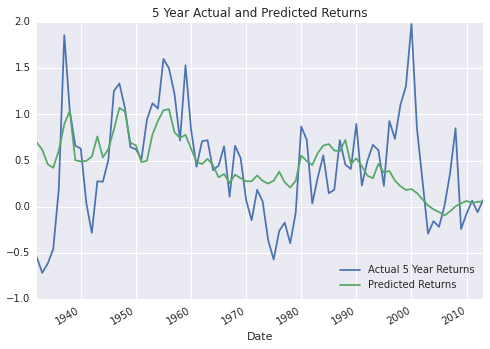

In [28]:
prices_df['xR_5'][5:].plot(title = '5 Year Actual and Predicted Returns')
plt.plot(prices_df['xR_5'].index[5:], xR_5_regr.fittedvalues)
plt.legend(['Actual 5 Year Returns', 'Predicted Returns'], loc='best');

Closing comment: This business of running regressions on signals to check those signal's forecast power is one of the most important tools in finance. Most quantitative hedge funds are basically founded on combing through a big set of $X$ variables, running regressions
$$R^e_{t+1}=a+b^\prime X_t+\epsilon_{t+1},$$

trying to overcome fishing biases, and then invest more in high expected-return strategies. This sort of regression produces $E_t(R^e_{t+1})$ and the formula we will derive later $w=\Sigma^{−1}E_t(R^e_{t+1})$ gives the portfolio. Well, it's not quite that simple, but that's the idea, which makes slogging through this question worthwhile.

The fact, which you just discovered, that expected returns vary a lot over time; that the premium for holding risk varies a lot over time, and is high when prices are low and in bad economic times, is one of the central facts of finance around which we orient our theories. 